In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:2px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:11pt;padding:4px;}
table.dataframe{font-size:10px;}
</style>
"""))

## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [2]:
import numpy as np
import pandas as pd 
import sys
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 데이터 셋
from tensorflow.keras.utils import to_categorical  # 원핫인코딩
from tensorflow.keras.models import Sequential,save_model, load_model 
from tensorflow.keras.layers import Input, Dense, Dropout
from matplotlib import pyplot as plt # loss와 acc의 학습 과정 그래프
from sklearn.metrics import confusion_matrix # 혼동행렬
from sklearn.preprocessing import MinMaxScaler, StandardScaler # 스케일 조정
from sklearn.model_selection import train_test_split  # 데이터 분리

In [3]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [4]:
print('타겟 : ',data[0,0])
# print('이미지(28*28을 1차원으로) : ', data[0,1:].reshape(28,28))

타겟 :  5.0


In [5]:
for row in data[2,1:].reshape(28,28):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 67232 39  0  0  0  0  0
  0  0  0  0 62 81  0  0  0  0  0  0  0  0  0  0  0  0  0  0120180 39  0  0  0  0  0
  0  0  0  0126163  0  0  0  0  0  0  0  0  0  0  0  0  0  2153210 40  0  0  0  0  0
  0  0  0  0220163  0  0  0  0  0  0  0  0  0  0  0  0  0 27254162  0  0  0  0  0  0
  0  0  0  0222163  0  0  0  0  0  0  0  0  0  0  0  0  0183254125  0  0  0  0  0  0
  0  0  0 46245163  0  0  0  0  0  0  0  0  0  0  0  0  0198254 56  0  0  0  0  0  0
  0  0  0120254163  0  0  0  0  0  0  0  0  0  0  0  0 23231254 2

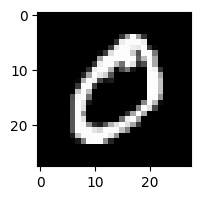

In [6]:
plt.figure(figsize=(2,2))
plt.imshow(data[1,1:].reshape(28,28), cmap='gray')

In [7]:
#%pip install opencv-contrib-python

In [8]:
#!pip show opencv-contrib-python

In [9]:
#%pip install opencv-python

In [10]:
# 칼라사진 -> 흑백모드의 넘파이 배열로
import cv2
imge_gray = cv2.imread('data/img.jpg', cv2.IMREAD_GRAYSCALE) # 흑백포멧으로 읽기
print(imge_gray.shape)
print(type(imge_gray))

(740, 1110)
<class 'numpy.ndarray'>


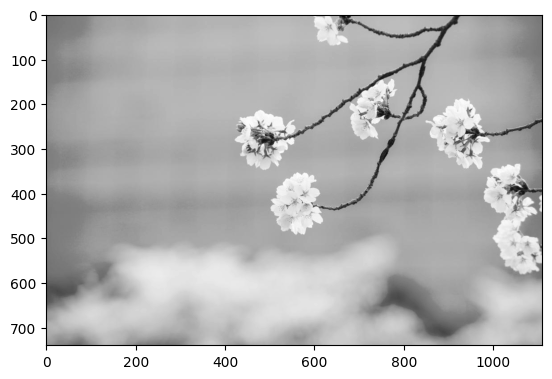

In [11]:
plt.imshow(imge_gray, cmap='gray')

# 1. 데이터 생성 및 전처리

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [13]:
print(y_train[10000])
for row in X_train[10000]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

3
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 29150195254255254176193150 96  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 48166224253253234196253253253253233  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 93244249253187 46 10  8  4 10194253253233  0  0  0  0  0  0  0  0  0
  0  0  0  0  0107253253230 48  0  0  0  0  0192253253156  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  3 20 20 15  0  0  0  0  0 43224253245 74  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0249253245126  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 14101223253248124  0  0  0  0

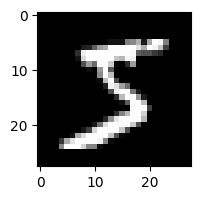

In [14]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='gray')

In [15]:
# 학습셋(6만개) -> 훈련셋(5만게) + 검증셋(1만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [16]:
# 학습셋(5만개 :fit용), 검증셋(1만:fit용), 테스트셋(1만개:평가용)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [17]:
# 입력(독립)변수 (n, 28,28) -> (n, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X = X_val.reshape(10000,-1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [18]:
# 훈련셋 5만개 -> 700개, 테스트셋 1만개 -> 300개 추출(목적 : 학습시간 절약), 테스트셋은 그대로
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]

train_X.shape, y_train.shape, val_X.shape, y_val.shape, test_X.shape, y_test.shape

((700, 784), (700,), (300, 784), (300,), (10000, 784), (10000,))

In [23]:
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
print(y_train[:2])
print(train_Y[:2])

[8 1]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [39]:
# 데이터 처리 전 작업
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋(6만개) -> 훈련셋(5만게) + 검증셋(1만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 입력(독립)변수 (n, 28,28) -> (n, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X = X_val.reshape(10000,-1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

# 훈련셋 5만개 -> 700개, 테스트셋 1만개 -> 300개 추출(목적 : 학습시간 절약), 테스트셋은 그대로
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]

# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)

print(train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape)

(700, 784) (700, 10) (300, 784) (300, 10) (10000, 784) (10000, 10)


## 2. 모델 구성

In [25]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [40]:
model.compile(loss='categorical_crossentropy',  # sparse_categorical_crossentropy 원핫인코딩 안할때
             optimizer='adam',
             metrics=['accuracy'])

# 4. 모델 학습

In [41]:
%%time
hist = model.fit(train_X,train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y))

Epoch 1/500
7/7 [==============================] - 0s 24ms/step - loss: 2.9188 - accuracy: 0.4743 - val_loss: 2.5247 - val_accuracy: 0.5100
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 2.7263 - accuracy: 0.4671 - val_loss: 2.3815 - val_accuracy: 0.5033
Epoch 3/500
7/7 [==============================] - 0s 8ms/step - loss: 2.6254 - accuracy: 0.4629 - val_loss: 2.2804 - val_accuracy: 0.5067
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 2.5461 - accuracy: 0.4471 - val_loss: 2.2230 - val_accuracy: 0.4833
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 2.4943 - accuracy: 0.4386 - val_loss: 2.1863 - val_accuracy: 0.4767
Epoch 6/500
7/7 [==============================] - 0s 7ms/step - loss: 2.4462 - accuracy: 0.4300 - val_loss: 2.1712 - val_accuracy: 0.4800
Epoch 7/500
7/7 [==============================] - 0s 7ms/step - loss: 2.4059 - accuracy: 0.4243 - val_loss: 2.1501 - val_accuracy: 0.4633
Epoch 8/500
7/7 [=========

7/7 [==============================] - 0s 6ms/step - loss: 1.2346 - accuracy: 0.5671 - val_loss: 1.8482 - val_accuracy: 0.4433
Epoch 118/500
7/7 [==============================] - 0s 7ms/step - loss: 1.2313 - accuracy: 0.5657 - val_loss: 1.8489 - val_accuracy: 0.4467
Epoch 119/500
7/7 [==============================] - 0s 6ms/step - loss: 1.2285 - accuracy: 0.5700 - val_loss: 1.8478 - val_accuracy: 0.4467
Epoch 120/500
7/7 [==============================] - 0s 6ms/step - loss: 1.2255 - accuracy: 0.5729 - val_loss: 1.8458 - val_accuracy: 0.4433
Epoch 121/500
7/7 [==============================] - 0s 6ms/step - loss: 1.2224 - accuracy: 0.5729 - val_loss: 1.8446 - val_accuracy: 0.4433
Epoch 122/500
7/7 [==============================] - 0s 7ms/step - loss: 1.2203 - accuracy: 0.5757 - val_loss: 1.8449 - val_accuracy: 0.4467
Epoch 123/500
7/7 [==============================] - 0s 6ms/step - loss: 1.2167 - accuracy: 0.5757 - val_loss: 1.8435 - val_accuracy: 0.4433
Epoch 124/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.9981 - accuracy: 0.6314 - val_loss: 1.8409 - val_accuracy: 0.4833
Epoch 234/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9976 - accuracy: 0.6343 - val_loss: 1.8509 - val_accuracy: 0.4833
Epoch 235/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9958 - accuracy: 0.6343 - val_loss: 1.8496 - val_accuracy: 0.4867
Epoch 236/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9938 - accuracy: 0.6343 - val_loss: 1.8419 - val_accuracy: 0.4900
Epoch 237/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9901 - accuracy: 0.6329 - val_loss: 1.8505 - val_accuracy: 0.4867
Epoch 238/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9888 - accuracy: 0.6271 - val_loss: 1.8500 - val_accuracy: 0.4867
Epoch 239/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9870 - accuracy: 0.6343 - val_loss: 1.8459 - val_accuracy: 0.4933
Epoch 240/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.8850 - accuracy: 0.6700 - val_loss: 1.9312 - val_accuracy: 0.5033
Epoch 350/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8844 - accuracy: 0.6757 - val_loss: 1.9364 - val_accuracy: 0.4933
Epoch 351/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8837 - accuracy: 0.6729 - val_loss: 1.9431 - val_accuracy: 0.4933
Epoch 352/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8828 - accuracy: 0.6757 - val_loss: 1.9387 - val_accuracy: 0.4967
Epoch 353/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8826 - accuracy: 0.6743 - val_loss: 1.9418 - val_accuracy: 0.4933
Epoch 354/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8818 - accuracy: 0.6771 - val_loss: 1.9411 - val_accuracy: 0.4933
Epoch 355/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8814 - accuracy: 0.6714 - val_loss: 1.9472 - val_accuracy: 0.4933
Epoch 356/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.8214 - accuracy: 0.7200 - val_loss: 2.0503 - val_accuracy: 0.5467
Epoch 466/500
7/7 [==============================] - 0s 7ms/step - loss: 0.8214 - accuracy: 0.7186 - val_loss: 2.0369 - val_accuracy: 0.5367
Epoch 467/500
7/7 [==============================] - 0s 7ms/step - loss: 0.8207 - accuracy: 0.7229 - val_loss: 2.0514 - val_accuracy: 0.5467
Epoch 468/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8203 - accuracy: 0.7214 - val_loss: 2.0443 - val_accuracy: 0.5367
Epoch 469/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8198 - accuracy: 0.7214 - val_loss: 2.0512 - val_accuracy: 0.5433
Epoch 470/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8192 - accuracy: 0.7186 - val_loss: 2.0488 - val_accuracy: 0.5400
Epoch 471/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8190 - accuracy: 0.7200 - val_loss: 2.0512 - val_accuracy: 0.5400
Epoch 472/500
7/7 [========

# 5. 모델 평가하기

In [36]:
# 학습 과정 살펴보기
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

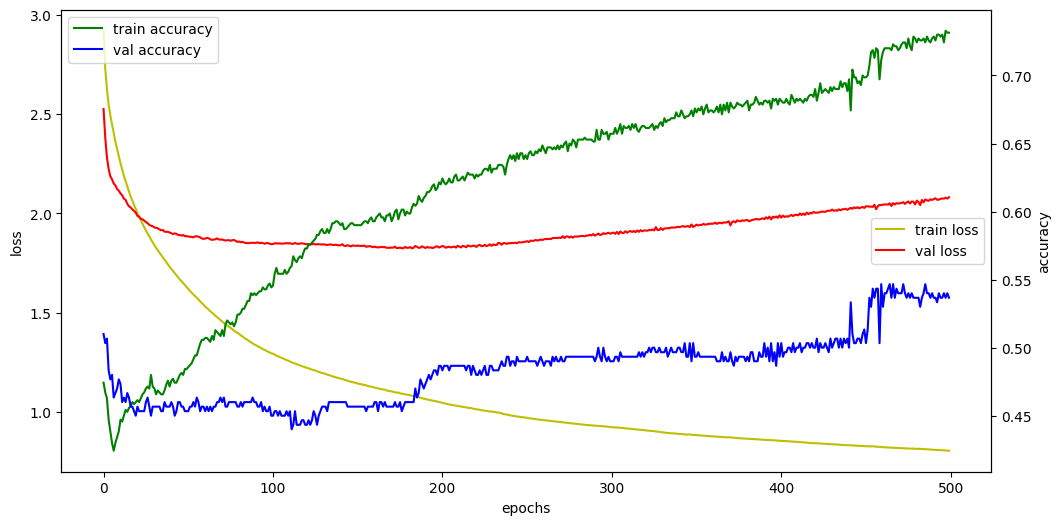

In [42]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [43]:
# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100)
print('loss :', loss_and_metrics[0])
print('accuracy : ', loss_and_metrics[1])

100/100 [==============================] - 0s 1ms/step - loss: 1.8809 - accuracy: 0.5215
loss : 1.880907416343689
accuracy :  0.5214999914169312


# ※ 위 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 모델 수정(레이어 추가, units수 증가)
- 과적합 방지(validation data추가, dropout, 활성화함수'relu'계열, tanh, ...)
- epoch 조정
- optimizer 변경

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 500)               392500    
                                                                 
 dropout_65 (Dropout)        (None, 500)               0         
                                                                 
 dense_125 (Dense)           (None, 1000)              501000    
                                                                 
 dropout_66 (Dropout)        (None, 1000)              0         
                                                                 
 dense_126 (Dense)           (None, 150)               150150    
                                                                 
 dense_127 (Dense)           (None, 10)                1510      
                                                                 
Total params: 1,045,160
Trainable params: 1,045,160
N

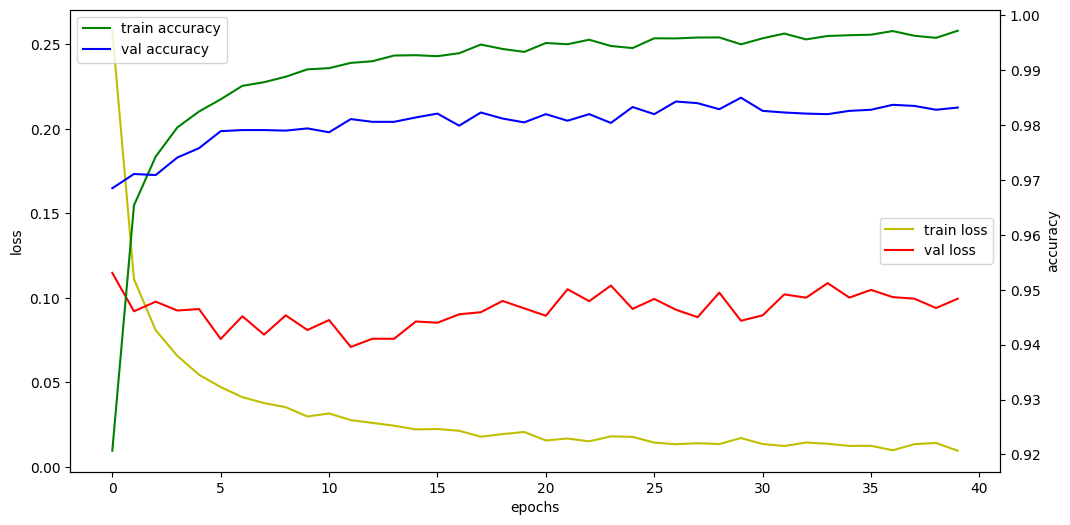

100/100 [==============================] - 0s 5ms/step - loss: 0.0859 - accuracy: 0.9853
loss : 0.08593180030584335
accuracy :  0.9853000044822693
CPU times: total: 20min 33s
Wall time: 4min 12s


In [69]:
%%time
# 데이터 처리 전 작업
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋(6만개) -> 훈련셋(5만게) + 검증셋(1만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 입력(독립)변수 (n, 28,28) -> (n, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X = X_val.reshape(10000,-1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0

# 훈련셋 5만개 -> 700개, 테스트셋 1만개 -> 300개 추출(목적 : 학습시간 절약), 테스트셋은 그대로
# train_idx = np.random.choice(50000, 15000)
# val_idx  = np.random.choice(10000, 7000)
# train_X = train_X[train_idx]
# y_train = y_train[train_idx]
# val_X = val_X[val_idx]
# y_val = y_val[val_idx]

# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)

# print(train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape)

# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1000, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(units=800, activation='relu'))
#model.add(Dropout(0.4))
# model.add(Dense(units=456, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(units=150, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))
model.summary()

# 학습과정 설정
model.compile(loss='categorical_crossentropy',  # sparse_categorical_crossentropy 원핫인코딩 안할때
             optimizer='adam',
             metrics=['accuracy'])

# 모델 학습
hist = model.fit(train_X,train_Y,
                epochs=40,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=)

fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100)
print('loss :', loss_and_metrics[0])
print('accuracy : ', loss_and_metrics[1])

In [76]:
# 실제값
test_Y.argmax(axis=1)  == y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [80]:
# 예측값
yhat = model.predict(test_X).argmax(axis=1)
yhat = np.argmax(model.predict(test_X), axis=1)
yhat

313/313 [==============================] - 1s 4ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [81]:
pd.crosstab(y_test, yhat)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,972,1,0,0,0,0,4,2,1,0
1,0,1129,1,0,0,0,2,1,2,0
2,0,1,1019,3,2,0,1,3,3,0
3,0,0,4,993,0,3,0,3,3,4
4,0,1,1,0,965,0,2,2,1,10
5,3,0,0,7,0,873,5,0,2,2
6,4,2,0,1,1,1,948,0,1,0
7,1,1,9,0,1,0,0,1011,1,4
8,1,0,2,4,3,2,3,2,953,4


In [82]:
confusion_matrix(y_test, yhat)

array([[ 972,    1,    0,    0,    0,    0,    4,    2,    1,    0],
       [   0, 1129,    1,    0,    0,    0,    2,    1,    2,    0],
       [   0,    1, 1019,    3,    2,    0,    1,    3,    3,    0],
       [   0,    0,    4,  993,    0,    3,    0,    3,    3,    4],
       [   0,    1,    1,    0,  965,    0,    2,    2,    1,   10],
       [   3,    0,    0,    7,    0,  873,    5,    0,    2,    2],
       [   4,    2,    0,    1,    1,    1,  948,    0,    1,    0],
       [   1,    1,    9,    0,    1,    0,    0, 1011,    1,    4],
       [   1,    0,    2,    4,    3,    2,    3,    2,  953,    4],
       [   0,    2,    1,    2,    7,    1,    0,    5,    1,  990]],
      dtype=int64)

In [84]:
# 틀린 갯수 : 
10000 - 10000* loss_and_metrics[1]

146.99995517730713

In [86]:
cnt = 0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt+=1
print('틀린 갯수 : ', cnt)

틀린 갯수 :  147


In [87]:
# 모델 저장
model.save('model/08_mnist.h5')

# ※ 콜백 함수1: 로그 출력

In [88]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 150)               117750    
                                                                 
 dense_131 (Dense)           (None, 10)                1510      
                                                                 
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________
epoch:10, loss:0.25037410855293274, acc:0.954285740852356, val_loss:0.47870269417762756, val_acc:0.8633333444595337
epoch:20, loss:0.08453719317913055, acc:0.9971428513526917, val_loss:0.4148593544960022, val_acc:0.8799999952316284
epoch:30, loss:0.03819187358021736, acc:1.0, val_loss:0.4162275195121765, val_acc:0.8799999952316284
epoch:40, loss:0.021035542711615562, acc:1.0, val_loss:0.42293575406074524, val_acc:0.8799999952316284
epoch:5

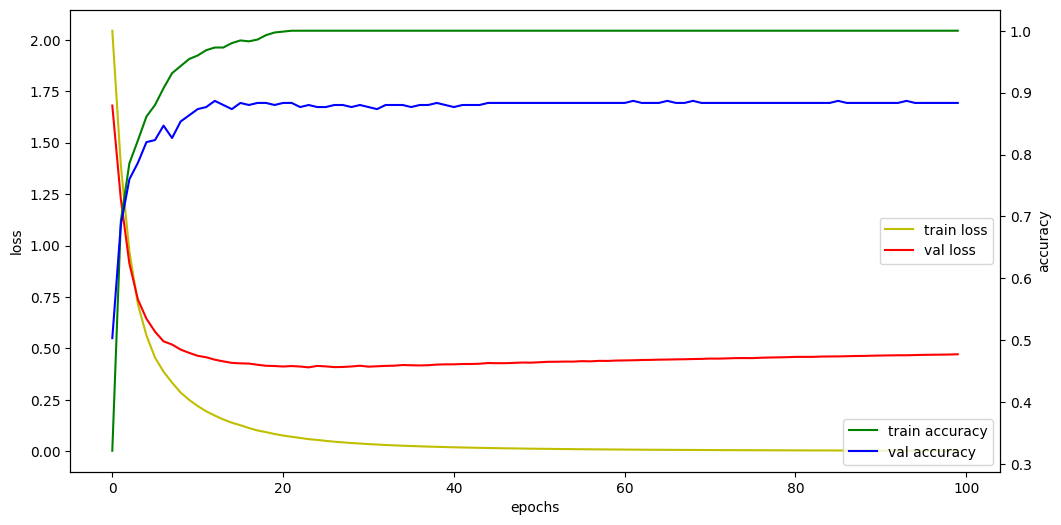

100/100 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.8784
loss : 0.4855790436267853
accuracy :  0.8784000277519226
CPU times: total: 9.89 s
Wall time: 5.64 s


In [91]:
%%time
# 매번 로그 출력하면 지저분해 질 수 있느니, 특정 에포크마다 로그 출력하도록 제한
class CustomHistory(Callback):
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):  # 1 epoch마다 자동 실행되는 함수
        self.epoch += 1 # epoch 마다 self.epoch 값을 1씩 증가
        if self.epoch % 10 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.\
                  format(self.epoch, ,
                        logs.get('loss'),
                        logs.get('accuracy','-'),
                        logs.get('val_loss','-'),
                        logs.get('val_accuracy','-') ) )
               


# 데이터 처리 전 작업
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋(6만개) -> 훈련셋(5만게) + 검증셋(1만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 입력(독립)변수 (n, 28,28) -> (n, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X = X_val.reshape(10000,-1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0

# 훈련셋 5만개 -> 700개, 테스트셋 1만개 -> 300개 추출(목적 : 학습시간 절약), 테스트셋은 그대로
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]

# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)

# print(train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape)

# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=150, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

# 학습과정 설정
model.compile(loss='categorical_crossentropy',  # sparse_categorical_crossentropy 원핫인코딩 안할때
             optimizer='adam',
             metrics=['accuracy'])

# 모델 학습
customHistory = CustomHistory() 
hist = model.fit(train_X,train_Y,
                epochs=100,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0,
                callbacks=[customHistory])  # 콜백 함수

fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100)
print('loss :', loss_and_metrics[0])
print('accuracy : ', loss_and_metrics[1])

# ※ 콜백함수2: EarlyStopping
- val_loss값이 늘어나면 지정한 epoch를 수행하지 않고 조기 종료
- val_accuracy값이 감소하면 지정한 epoch를 수행하지 않고 조기 종료

In [95]:
%%time
# 매번 로그 출력하면 지저분해 질 수 있느니, 특정 에포크마다 로그 출력하도록 제한
class CustomHistory(Callback):
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):  # 1 epoch마다 자동 실행되는 함수
        self.epoch += 1 # epoch 마다 self.epoch 값을 1씩 증가
        if self.epoch % 10 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.\
                  format(self.epoch, 
                        logs.get('loss'),
                        logs.get('accuracy','-'),
                        logs.get('val_loss','-'),
                        logs.get('val_accuracy','-') ) )
               


# 데이터 처리 전 작업
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋(6만개) -> 훈련셋(5만게) + 검증셋(1만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 입력(독립)변수 (n, 28,28) -> (n, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X = X_val.reshape(10000,-1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0

# 훈련셋 5만개 -> 700개, 테스트셋 1만개 -> 300개 추출(목적 : 학습시간 절약), 테스트셋은 그대로
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]

# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)

# print(train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape)

# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=150, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

# 학습과정 설정
model.compile(loss='categorical_crossentropy',  # sparse_categorical_crossentropy 원핫인코딩 안할때
             optimizer='adam',
             metrics=['accuracy'])

# 모델 학습
# monitor 기준으로 patience번 이상 안 좋은 데이터가 나오면 조기 종료
earlystopping = EarlyStopping(monitor='val_accuracy', patience=2)  
hist = model.fit(train_X,train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlystopping])  # 콜백 함수

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 150)               117750    
                                                                 
 dense_139 (Dense)           (None, 10)                1510      
                                                                 
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
7/7 [==============================] - 0s 27ms/step - loss: 2.0793 - accuracy: 0.3657 - val_loss: 1.6656 - val_accuracy: 0.6100
Epoch 2/500
7/7 [==============================] - 0s 9ms/step - loss: 1.3885 - accuracy: 0.7329 - val_loss: 1.1471 - val_accuracy: 0.7333
Epoch 3/500
7/7 [==============================] - 0s 8ms/step - loss: 0.9403 - accuracy: 0.8100 - val_loss: 0.8462 - val_accuracy: 0.7567
Epoch 4/500
7/7 [========

# ※ 콜백 함수3 : ModelCheckpoint
- epoch 마다 val_accuracy(val_loss, accuracy, loss)값이 좋을 때 마다 자동 저장하는 콜백

In [96]:
%%time
# 매번 로그 출력하면 지저분해 질 수 있느니, 특정 에포크마다 로그 출력하도록 제한
class CustomHistory(Callback):
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):  # 1 epoch마다 자동 실행되는 함수
        self.epoch += 1 # epoch 마다 self.epoch 값을 1씩 증가
        if self.epoch % 10 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.\
                  format(self.epoch, 
                        logs.get('loss'),
                        logs.get('accuracy','-'),
                        logs.get('val_loss','-'),
                        logs.get('val_accuracy','-') ) )
               


# 데이터 처리 전 작업
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋(6만개) -> 훈련셋(5만게) + 검증셋(1만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 입력(독립)변수 (n, 28,28) -> (n, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X = X_val.reshape(10000,-1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0

# 훈련셋 5만개 -> 700개, 테스트셋 1만개 -> 300개 추출(목적 : 학습시간 절약), 테스트셋은 그대로
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]

# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)

# print(train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape)

# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=150, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

# 학습과정 설정
model.compile(loss='categorical_crossentropy',  # sparse_categorical_crossentropy 원핫인코딩 안할때
             optimizer='adam',
             metrics=['accuracy'])

# 모델 학습
# monitor 기준으로 patience번 이상 안 좋은 데이터가 나오면 조기 종료
earlystopping = EarlyStopping(monitor='val_accuracy', patience=50)  

# 모델 자동 저장 콜백
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder): # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'

 # 저장 경로
checkpoint = ModelCheckpoint(filepath=file, 
                             monitor='val_accuracy',  # 모니터할 지표
                             save_best_only=True,  # 모니터링 지표가 개선된 경우만 저장
                             mode='max',  # 값이 클수록 저장
                             verbose=1,  # 저장시 로그 출력
                            )

hist = model.fit(train_X,train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlystopping, checkpoint])  # 콜백 함수

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 150)               117750    
                                                                 
 dense_141 (Dense)           (None, 10)                1510      
                                                                 
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1/7 [===>..........................] - ETA: 1s - loss: 2.3554 - accuracy: 0.0900
Epoch 1: val_accuracy improved from -inf to 0.60333, saving model to ./model08\mnist-001-val0.6033.h5
7/7 [==============================] - 0s 32ms/step - loss: 2.0026 - accuracy: 0.4000 - val_loss: 1.6420 - val_accuracy: 0.6033
Epoch 2/500
1/7 [===>..........................] - ETA: 0s - loss: 1.5045 - accuracy: 0.7600
Epoch 2: val_accuracy impro

7/7 [==============================] - 0s 8ms/step - loss: 0.0436 - accuracy: 1.0000 - val_loss: 0.4173 - val_accuracy: 0.8667
Epoch 27/500
1/7 [===>..........................] - ETA: 0s - loss: 0.0391 - accuracy: 1.0000
Epoch 27: val_accuracy did not improve from 0.86667
7/7 [==============================] - 0s 8ms/step - loss: 0.0406 - accuracy: 1.0000 - val_loss: 0.4164 - val_accuracy: 0.8633
Epoch 28/500
1/7 [===>..........................] - ETA: 0s - loss: 0.0319 - accuracy: 1.0000
Epoch 28: val_accuracy did not improve from 0.86667
7/7 [==============================] - 0s 8ms/step - loss: 0.0378 - accuracy: 1.0000 - val_loss: 0.4176 - val_accuracy: 0.8633
Epoch 29/500
1/7 [===>..........................] - ETA: 0s - loss: 0.0336 - accuracy: 1.0000
Epoch 29: val_accuracy did not improve from 0.86667
7/7 [==============================] - 0s 8ms/step - loss: 0.0349 - accuracy: 1.0000 - val_loss: 0.4174 - val_accuracy: 0.8633
CPU times: total: 3.48 s
Wall time: 2.77 s


In [97]:
model.evaluate(val_X, val_Y)

10/10 [==============================] - 0s 3ms/step - loss: 0.4174 - accuracy: 0.8633


[0.4173904061317444, 0.8633333444595337]